In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
!pip install scipy
from scipy.cluster.hierarchy import dendrogram, linkage
import sklearn.metrics
#!pip install umap-learn
import umap 

In [2]:
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Users\Enric\anaconda3\python.exe
3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)


In [3]:
#path = "H:\\Dropbox\\Personale\\Ricerca\\Clustering_Project_with_Notre_Dame\\Datasets\\"
path = "C:\\Users\\Enric\\Dropbox\\Personale\\Ricerca\\Clustering_Project_with_Notre_Dame\\Datasets\\"
name = "UnsupervisedDataLamb0.1.npy"

In [4]:
array = np.load(path+name)
print(type(array))

<class 'numpy.ndarray'>


In [5]:
# Create the dataframe
df = pd.DataFrame(np.transpose(array))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23898 entries, 0 to 23897
Columns: 750 entries, 0 to 749
dtypes: float64(750)
memory usage: 136.7 MB


In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,740,741,742,743,744,745,746,747,748,749
0,0.862093,0.447217,0.194166,0.112359,0.069931,0.028747,0.024671,0.011602,0.001590,0.001578,...,8.051625e-17,8.051625e-17,8.051625e-17,8.051625e-17,8.051625e-17,8.051625e-17,8.051625e-17,8.051625e-17,8.051625e-17,8.051625e-17
1,0.856193,0.496774,0.121548,0.058969,0.031917,0.028369,0.006752,0.004902,0.001643,0.000699,...,8.258954e-17,8.258954e-17,8.258954e-17,8.258954e-17,8.258954e-17,8.258954e-17,8.258954e-17,8.258954e-17,8.258954e-17,8.258954e-17
2,0.903267,0.337944,0.241579,0.083284,0.058293,0.029813,0.015394,0.007879,0.003567,0.002039,...,6.992663e-17,6.992663e-17,6.992663e-17,6.992663e-17,6.992663e-17,6.992663e-17,6.992663e-17,6.992663e-17,6.992663e-17,6.992663e-17
3,0.884993,0.396839,0.163689,0.131121,0.100216,0.056472,0.039479,0.020943,0.007215,0.004149,...,8.834657e-17,8.834657e-17,8.834657e-17,8.834657e-17,8.834657e-17,8.834657e-17,8.834657e-17,8.834657e-17,8.834657e-17,8.834657e-17
4,0.903044,0.316704,0.206592,0.172242,0.083758,0.048417,0.044018,0.015724,0.012984,0.008942,...,8.401218e-17,8.401218e-17,8.401218e-17,8.401218e-17,8.401218e-17,8.401218e-17,8.401218e-17,8.401218e-17,8.401218e-17,8.401218e-17


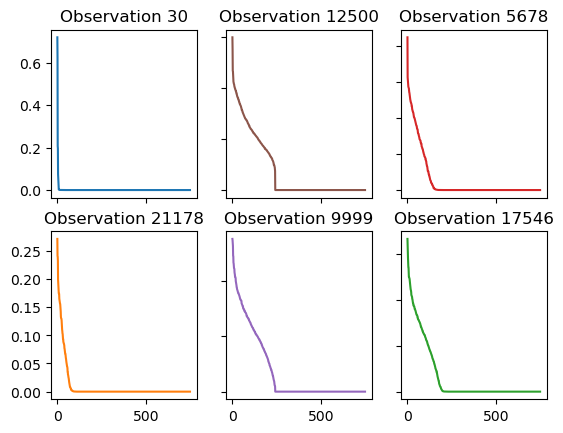

In [8]:
# plotting the points
x = range(0, 750)
y = [30, 12500, 5678, 21178, 9999, 17546]
fig, axs = plt.subplots(2, 3)

axs[0, 0].plot(x, df.iloc[y[0]])
label = 'Observation '+ str(y[0])
axs[0, 0].set_title(label)

axs[0, 1].plot(x, df.iloc[y[1]], 'tab:brown')
label = 'Observation '+ str(y[1])
axs[0, 1].set_title(label)

axs[0, 2].plot(x, df.iloc[y[2]], 'tab:red')
label = 'Observation '+ str(y[2])
axs[0, 2].set_title(label)

axs[1, 0].plot(x, df.iloc[y[3]], 'tab:orange')
label = 'Observation '+ str(y[3])
axs[1, 0].set_title(label)

axs[1, 1].plot(x, df.iloc[y[4]], 'tab:purple')
label = 'Observation '+ str(y[4])
axs[1, 1].set_title(label)

axs[1, 2].plot(x, df.iloc[y[5]], 'tab:green')
label = 'Observation '+ str(y[5])
axs[1, 2].set_title(label)



# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
     ax.label_outer()
        

# Scale the dataset
Scaling can be defined as a statistical method of rescaling data to adjust values measured on different scales into a common scale. The primary objective of normalization is to fit all the data points between the range of 0 to 1, thereby enabling the data points to become more comparable.

Normalization is a commonly employed technique for scaling data, wherein the minimum value of a feature is transformed into 0 and the maximum value into 1. This technique is used to remove the effect of the scale of measurement from the data and provide a standardized representation. It facilitates the comparison of data points from different sources and improves the performance of various machine learning algorithms.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df)
df = pd.DataFrame( scaled_array, columns = df.columns )

In [10]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# PCA
Project the dataset onto a 2-dimensional space

In [11]:
COMPONENTS = 10

pca = PCA(n_components = COMPONENTS)
x_9d = pca.fit_transform(df)

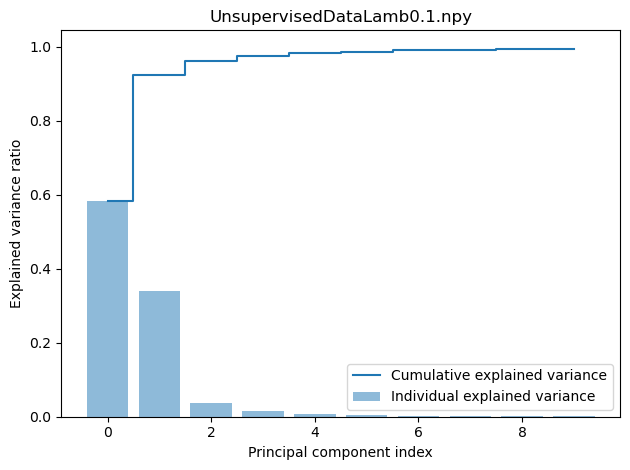

In [12]:
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title(name)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

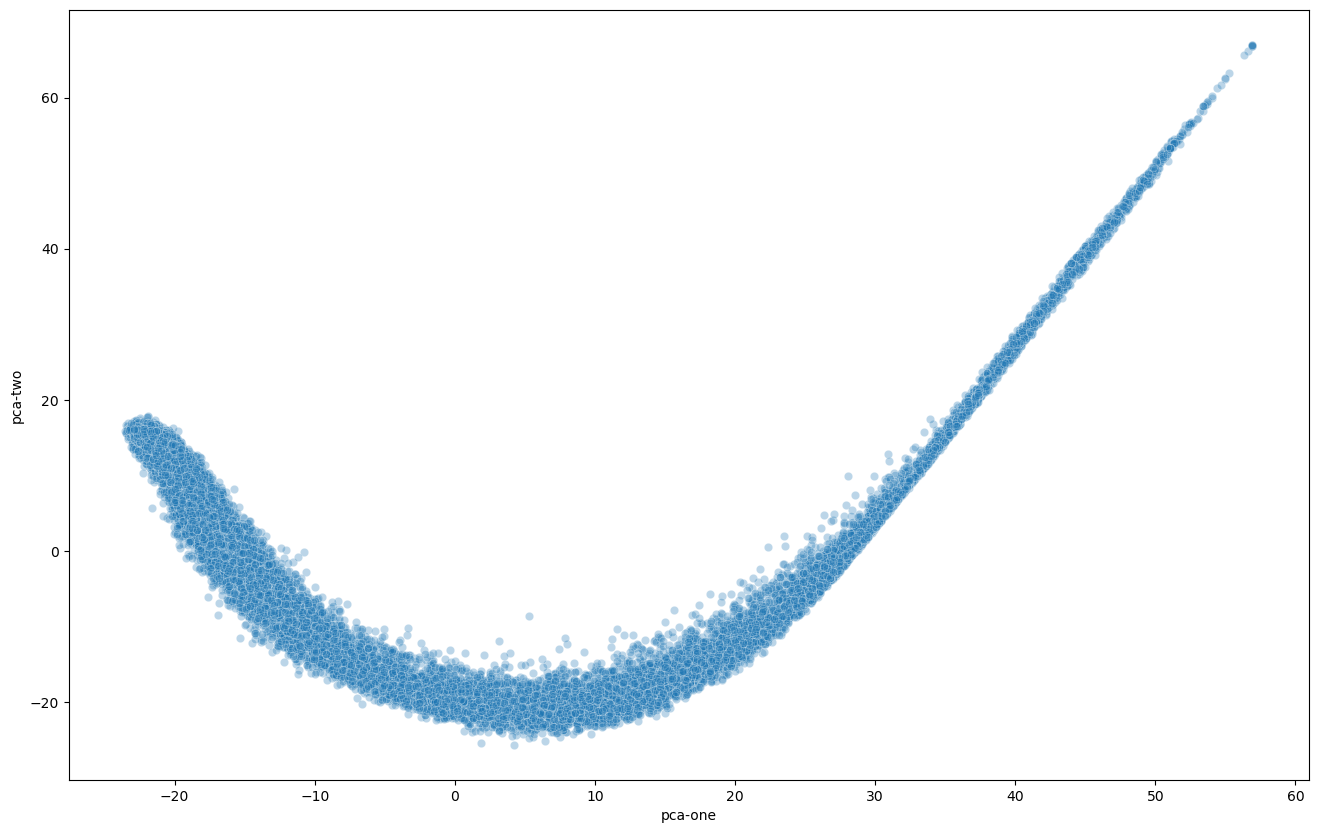

In [26]:


%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


import seaborn as sns
df = pd.DataFrame(x_9d)
df['pca-one'] = x_9d[:,0]
df['pca-two'] = x_9d[:,1] 
rndperm = np.random.permutation(x_9d.shape[0])
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    #hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)